In [1]:
# download on https://chalearnlap.cvc.uab.cat/dataset/26/description/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from PIL import Image
from IPython.display import display, HTML

In [3]:
train_df = pd.read_csv('../datasets/clap16/appa-real-release/gt_train.csv')
val_df = pd.read_csv('../datasets/clap16/appa-real-release/gt_valid.csv')
test_df = pd.read_csv('../datasets/clap16/appa-real-release/gt_test.csv')

In [4]:
train_df['file_name'] = train_df['file_name'].apply(lambda fn: f'./train/{fn}')
val_df['file_name'] = val_df['file_name'].apply(lambda fn: f'./valid/{fn}')
test_df['file_name'] = test_df['file_name'].apply(lambda fn: f'./test/{fn}')

In [5]:
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

In [6]:
df.head()

,file_name,real_age,apparent_age,worker_age,worker_gender
0,./train/000000.jpg,4,5,36,male
1,./train/000000.jpg,4,4,38,female
2,./train/000000.jpg,4,7,52,female
3,./train/000000.jpg,4,5,50,male
4,./train/000000.jpg,4,4,52,female


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260656 entries, 0 to 260655
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   file_name      260656 non-null  object
 1   real_age       260656 non-null  int64 
 2   apparent_age   260656 non-null  int64 
 3   worker_age     260656 non-null  int64 
 4   worker_gender  110479 non-null  object
dtypes: int64(3), object(2)
memory usage: 9.9+ MB


<AxesSubplot:>

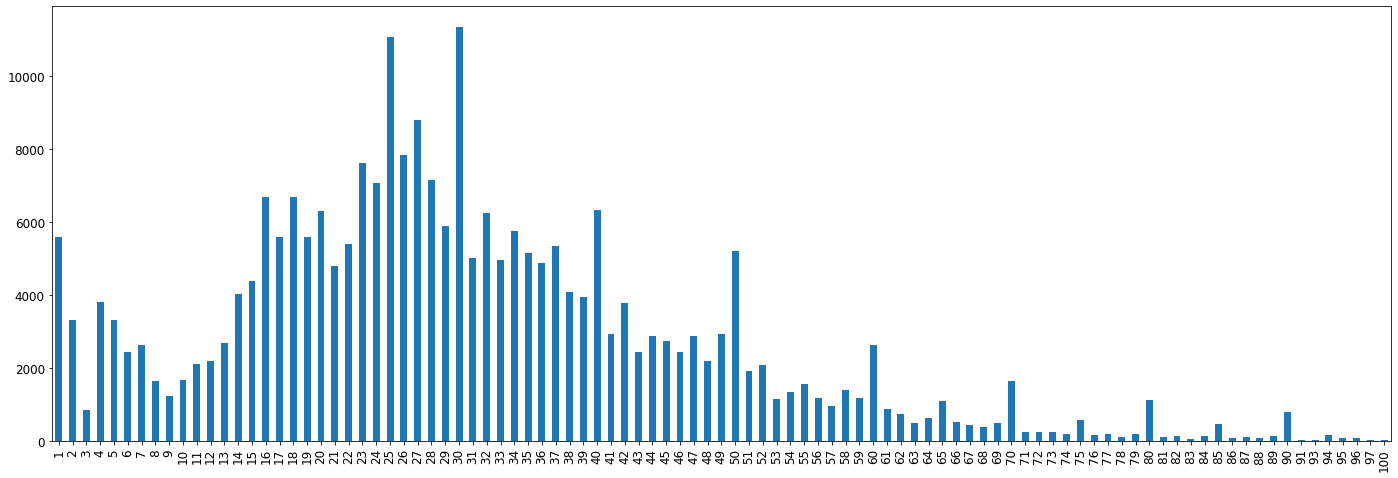

In [8]:
df['real_age'].value_counts().sort_index().plot(kind='bar', fontsize=12, figsize=(24,8))

In [9]:
total_cnt, minor_cnt = 0, 0

for age, count in df['real_age'].value_counts().items():
    if age < 18:
        minor_cnt += count
    total_cnt += count
    
minor_p = minor_cnt/total_cnt

In [10]:
print(f'Percentile of minors: \t {minor_p * 100 : .2f}%')

Percentile of minors: 	  20.81%


In [28]:
samples = df.sample(n=18)

In [29]:
samples.head()

,file_name,real_age,apparent_age,worker_age,worker_gender
173227,./valid/005254.jpg,31,29,36,NaN
25961,./train/000773.jpg,1,1,48,female
65832,./train/001999.jpg,37,40,21,NaN
249568,./test/007321.jpg,5,7,51,female
211508,./test/006306.jpg,49,35,32,male


In [14]:
def display_image_grid(df, n_rows, n_cols):
    """
    Displays a grid of images in a Jupyter Notebook using ImageGrid.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing image paths.
    n_cols (int): Number of columns in the grid.
    """
    fig = plt.figure(figsize=(n_cols * 3, n_rows * 3))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(n_rows, n_cols),  # create grid of axes
                     axes_pad=0.0,  # pad between axes in inches
                     )

    img_size=(300, 325)
    
    for ax, image_path in zip(grid, df['file_name']):
        image = Image.open(f'../datasets/clap16/appa-real-release/{image_path}')
        image = image.resize(img_size, Image.ANTIALIAS)  # Resize image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis
    
    plt.show()

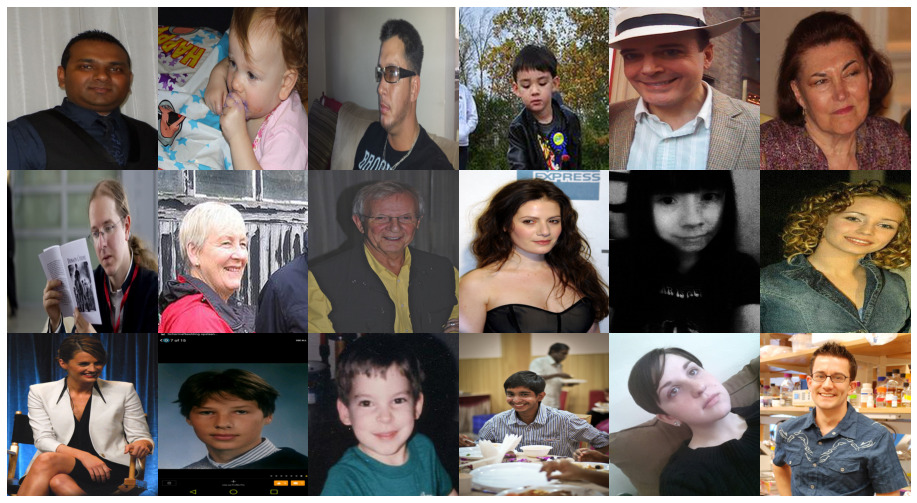

In [30]:
display_image_grid(samples, n_rows=3, n_cols=6)

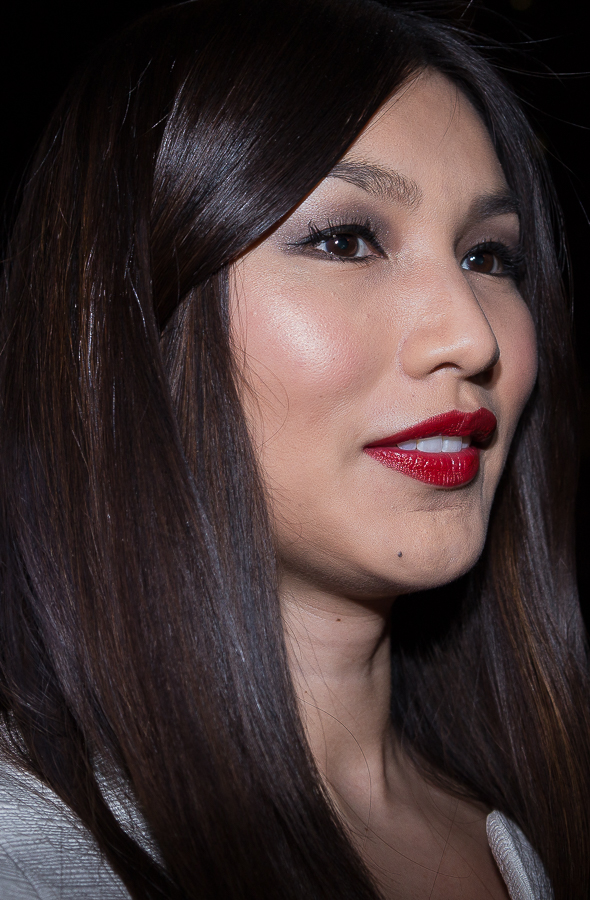

In [113]:
sample = df.sample(n=1)

img = Image.open(f'../datasets/clap16/appa-real-release/{sample["file_name"].iloc[0]}')

display(img)